In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")
#sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

import molecules as mc
import forces as fc
import random
import copy

In [2]:
def lin_repulsion(x, b=10):
  #if ( x < 0):
  #  return b
  return max(-(1/3)*x + b,0)

def lin_attraction(x, b =-10):
  #if ( x < 0):
  #  return b
  return min((1/3)*x + b,0)

def lin_attraction_mol(m1,m2, b =-10):
  #if ( x < 0):
  #  return b
  return min((1/3)*(mc.dist(m1,m2)) + b,0)

In [3]:
import itertools
def grid_points(box_size,radius, spacing):
  x = np.arange(radius + spacing, box_size[0]- radius- spacing, step = 2*radius + spacing, dtype=float)
  y = np.arange(radius+ spacing, box_size[1]- radius- spacing, step = 2*radius + spacing, dtype=float)
  z = np.arange(radius+ spacing, box_size[2]- radius- spacing, step = 2*radius + spacing, dtype=float)
  all_combinations = list(itertools.product(x,y,z))
  print(x,y,z)
  return [np.array(comb) for comb in all_combinations]

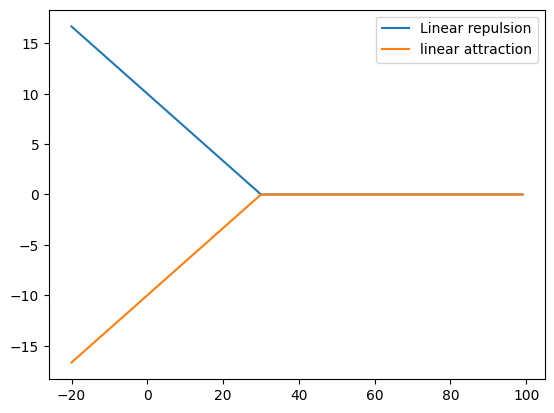

In [4]:
x = np.arange(-20,100)
f_rep = [lin_repulsion(xi) for xi in x]
f_att = [lin_attraction(xi) for xi in x]
plt.figure()
plt.plot(x,f_rep,label="Linear repulsion")
plt.plot(x,f_att,label="linear attraction")
plt.legend()
plt.show()


In [5]:
# Parameters for universe initialization
box_const_size = 850
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
#num_molecules = 5
num_steps = 100000
radius  = 100
num_molecules = 30
#other setup
seed = 1234#1313
spacing = 10
#combs = grid_points(box_size, radius, spacing)
#molecules = [mc.Molecule(pos, radius) for pos in combs]

#uni = mc.SimpleUniverse(box_size, len(molecules),np.repeat(radius,len(molecules)),seed, own_molecules = molecules, force_fun = cust_force)
uni = mc.SimpleUniverse(box_size, num_molecules,np.repeat(radius,num_molecules),seed, force_fun = lin_attraction_mol)
print(type(uni.molecules[0].pos[0]))

<class 'numpy.float64'>


In [6]:
#step loop
points = []

# Perform Simulation
for i in range(num_steps):
  #randomly select a molecule
  uni.make_step_thresh()
  #store intermediate results?
  points.append(uni.get_state())

acc, rej, accs, num = uni.get_stats()
print(f"Accepted: {acc}, Rejected: {rej}, Rate: {acc/num}")

Accepted: 92788, Rejected: 7212, Rate: 0.92788


In [7]:
# get only some steps
xs = np.array([inner_list[0] for sublist in points for inner_list in sublist]).reshape((num_steps,num_molecules))
ys = np.array([inner_list[1] for sublist in points for inner_list in sublist]).reshape((num_steps,num_molecules))
zs = np.array([inner_list[2] for sublist in points for inner_list in sublist]).reshape((num_steps,num_molecules))


In [8]:
xs = [xs[i] for i in range(len(xs)) if i % 100 == 0]
ys = [ys[i] for i in range(len(ys)) if i % 100 == 0]
zs = [zs[i] for i in range(len(zs)) if i % 100 == 0]

In [9]:
#animate:
from __future__ import absolute_import, division, print_function
from mayavi import mlab
import numpy as np
import math
num_molecules = len(uni.molecules)


mlab.clf()
#mlab.points3d(0,0,0)
plt = mlab.points3d(points[0][:, 0], points[0][:, 1], points[0][:, 2], resolution = 50, scale_factor = 200.)
mlab.axes()
text_position = (0,0,0)
text_actor = mlab.text3d(500,150, 510, "TESTING", scale = 40, color = (0,0,0))
@mlab.animate(delay = 100, ui = True, support_movie = True) #delay = 100
def anim():
    f = mlab.gcf()
    while True:
        #temp = "step: "
        for step in range(len(xs)):#num_steps
            x = xs[step]#points[step][:, 0]
            y = ys[step]#points[step][:, 1]
            z = zs[step]#points[step][:, 2]
            plt.mlab_source.set(x=x, y=y, z=z)
            text_actor.text = f"Frame: {step}"
            
            yield


anim()
mlab.show()